
Importing the Dependencies

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset to a Pandas DataFrame

credit_card_data = pd.read_csv('/content/creditcard.csv')

In [7]:
# Printing the first 5 rows of the datasets

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
# Printing the last 5 rows of the datasets

credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202098,134173.0,2.190915,-0.500542,-2.091142,-0.949195,0.207997,-0.554384,-0.320056,-0.124357,-0.739798,...,-0.015466,-0.074259,0.155632,0.188719,0.004812,-0.302568,-0.033305,-0.043718,15.00,0.0
202099,134173.0,0.032271,0.721912,0.125819,-0.782183,0.540391,-0.605079,0.817998,0.035000,-0.088980,...,-0.249543,-0.632341,0.021629,-0.447458,-0.509893,0.149205,0.235089,0.080468,2.58,0.0
202100,134174.0,0.002220,0.876646,0.462381,-0.495989,0.237091,-1.260665,1.041885,-0.222482,-0.109251,...,-0.222606,-0.454034,0.135248,0.398668,-0.550344,0.116936,0.250801,0.101753,8.04,0.0
202101,134174.0,-2.086855,-1.256170,1.370729,-1.738676,0.087723,-0.955949,0.633298,-0.307105,0.700150,...,0.123289,0.645205,-0.514751,0.039916,0.608285,0.459709,0.222247,-0.090673,299.45,0.0
202102,134175.0,0.179837,0.995141,-1.387194,-0.444863,0.653645,-0.847897,0.612073,0.357891,-0.425488,...,-0.031810,-0.247224,0.238356,0.651853,-0.810344,0.146304,-0.138182,-0.039010,NaN,NaN


In [10]:
# Getting the Dataset Info

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202103 entries, 0 to 202102
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    202103 non-null  float64
 1   V1      202103 non-null  float64
 2   V2      202103 non-null  float64
 3   V3      202103 non-null  float64
 4   V4      202103 non-null  float64
 5   V5      202103 non-null  float64
 6   V6      202103 non-null  float64
 7   V7      202103 non-null  float64
 8   V8      202103 non-null  float64
 9   V9      202103 non-null  float64
 10  V10     202103 non-null  float64
 11  V11     202103 non-null  float64
 12  V12     202103 non-null  float64
 13  V13     202103 non-null  float64
 14  V14     202103 non-null  float64
 15  V15     202103 non-null  float64
 16  V16     202103 non-null  float64
 17  V17     202103 non-null  float64
 18  V18     202103 non-null  float64
 19  V19     202103 non-null  float64
 20  V20     202103 non-null  float64
 21  V21     20

In [14]:
# Checking for the distribution of legit transactions & fraudulent transactions

credit_card_data['Class'].value_counts()

,count
Class,
0.0,201715
1.0,387


Highy Unbalanced Dataset

*   0: Legal Transaction
*   1: Fraud Transaction

In [15]:
# Seperating the data for Analysis

legit = credit_card_data[credit_card_data.Class == 0] # whole row will be stored
fraud = credit_card_data[credit_card_data.Class == 1]

In [18]:
# Checking for the Dimmesions

print(legit.shape) # (rows, cols)
print(fraud.shape)

(201715, 31)
(387, 31)


In [19]:
# Getting the statistical measure of the legit data

legit.Amount.describe()

,Amount
count,201715.000000
mean,89.738838
std,248.926814
min,0.000000
25%,5.990000
50%,23.000000
75%,79.200000
max,19656.530000


*   25% of the Amount is less than 5.990000
*   50% of the Amount is less than 23.000000
*   75% of the Amount is less than 79.200000

In [20]:
# Getting the statistical measure of the fraud data

fraud.Amount.describe()

,Amount
count,387.000000
mean,121.515762
std,255.472612
min,0.000000
25%,1.000000
50%,12.310000
75%,105.350000
max,2125.870000


In [22]:
# Comparing the values for both transaction

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,71317.991914,-0.088952,-0.005913,0.320903,0.063655,-0.098671,0.046978,-0.034958,0.014189,0.014456,...,0.017814,-0.015482,-0.045175,-0.014914,0.003800,0.058563,0.005684,0.001147,0.001638,89.738838
1.0,61661.943152,-5.664014,4.188275,-7.714600,4.757093,-4.067280,-1.408189,-6.597319,0.684141,-2.759349,...,0.390587,0.789496,-0.021094,-0.053343,-0.068914,0.070078,0.036667,0.178085,0.057733,121.515762


Performing Under Sampling

Build a sample database conataining similar distributuion of Legit transactions and Fraud Transaction

*   Number of Legit Transactions: 201715
*   Number of Fraud Transactions: 387

In [23]:
# Taking random 387 rows from the legit database

legit_sample = legit.sample(n=387)

Concatination two data frames: legit_sample and fraud

In [24]:
new_data = pd.concat([legit_sample, fraud], axis = 0)

# axis=0 means row-wise concatenation (i.e., it adds rows).
# The result is a new DataFrame new_data that stacks fraud under legit_sample
# To create a balanced dataset.

In [38]:
print(new_data.shape)

(774, 31)


In [27]:
# Printing the first 5 rows of the dataset

new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104659,69175.0,-1.630851,-0.691248,1.601434,-0.991687,-1.569920,1.782354,1.902602,-0.172628,1.175078,...,-0.410711,-0.004791,0.189256,-0.219545,-0.131230,0.809054,0.180153,-0.407186,452.39,0.0
89880,62765.0,-1.588384,-0.957117,1.605611,-2.331600,-0.904108,-0.396843,-1.063822,0.550784,-2.198408,...,0.051218,0.230376,-0.060298,-0.309881,0.366342,-0.140256,-0.155391,-0.033803,39.00,0.0
25475,33623.0,1.259206,0.262210,0.514672,0.618763,-0.461457,-0.985599,0.076492,-0.216944,0.014908,...,-0.254939,-0.729206,0.132855,0.380257,0.224508,0.094107,-0.027902,0.019543,2.58,0.0
59213,48743.0,-1.924137,0.887580,1.208970,0.181380,0.133847,1.121465,-0.391957,1.324485,-0.643775,...,0.068338,0.134590,-0.116871,-0.569991,0.028654,0.397410,-0.235003,-0.172576,23.93,0.0
190300,128774.0,-0.084063,1.032666,-0.628074,-1.362572,1.564750,-1.018665,1.931438,-0.670888,-0.115080,...,0.153304,0.978080,-0.290090,0.800175,-0.345501,-0.018186,0.165244,-0.122896,3.70,0.0


In [28]:
# Printing the last 5 rows of the dataset

new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1.0
198868,132688.0,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1.0
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1.0
201098,133731.0,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,-3.156827,...,0.129372,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,0.00,1.0
201601,133958.0,0.523820,1.531708,-4.176390,3.584615,-1.023954,-0.502471,-1.891966,0.878417,-1.541942,...,0.851859,1.176927,0.453553,0.485211,-0.500687,-0.108284,0.269477,-0.063245,130.21,1.0


In [29]:
# Checking the Uniformaity of the new_data

new_data['Class'].value_counts()

,count
Class,
0.0,387
1.0,387


In [30]:
# Comparing the values for both transaction in new_data

new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,68531.328165,-0.310508,-0.139614,0.354076,0.115805,-0.267809,0.090667,0.065027,0.083097,0.041901,...,0.078064,0.002762,-0.092420,-0.070712,-0.011432,0.071612,0.017723,-0.025402,-0.006653,142.635814
1.0,61661.943152,-5.664014,4.188275,-7.714600,4.757093,-4.067280,-1.408189,-6.597319,0.684141,-2.759349,...,0.390587,0.789496,-0.021094,-0.053343,-0.068914,0.070078,0.036667,0.178085,0.057733,121.515762


In [36]:
# Spilliting the Data into Fearures and Target

X = new_data.drop(columns='Class', axis = 1)
Y = new_data['Class']

`X = new_data.drop(columns='Class', axis=1)`

*   Removes the 'Class' column from new_data
*   axis=1 means you're dropping a column (not a row)
*   So X contains all columns except 'Class', which are used as features for training a modelm

`Y = new_data['Class']`

*   Extracts only the 'Class' column as the target
*   n fraud detection datasets like this, the 'Class' column typically has:
  *   0 for legitimate transactions
  *   1 for fraudulent transactions

In [37]:
print(X.shape)
print(Y.shape)

(774, 30)
(774,)


In [39]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
104659   69175.0 -1.630851 -0.691248  1.601434 -0.991687 -1.569920  1.782354   
89880    62765.0 -1.588384 -0.957117  1.605611 -2.331600 -0.904108 -0.396843   
25475    33623.0  1.259206  0.262210  0.514672  0.618763 -0.461457 -0.985599   
59213    48743.0 -1.924137  0.887580  1.208970  0.181380  0.133847  1.121465   
190300  128774.0 -0.084063  1.032666 -0.628074 -1.362572  1.564750 -1.018665   
...          ...       ...       ...       ...       ...       ...       ...   
197586  132086.0 -0.361428  1.133472 -2.971360 -0.283073  0.371452 -0.574680   
198868  132688.0  0.432554  1.861373 -4.310353  2.448080  4.574094 -2.979912   
199896  133184.0 -1.212682 -2.484824 -6.397186  3.670562 -0.863375 -1.855855   
201098  133731.0  1.176633  3.141918 -6.140445  5.521821  1.768515 -1.727186   
201601  133958.0  0.523820  1.531708 -4.176390  3.584615 -1.023954 -0.502471   

              V7        V8        V9  .

In [40]:
print(Y)

104659    0.0
89880     0.0
25475     0.0
59213     0.0
190300    0.0
         ... 
197586    1.0
198868    1.0
199896    1.0
201098    1.0
201601    1.0
Name: Class, Length: 774, dtype: float64


Split the data into Training Data and Test Data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

**✅ What it does:** It splits your dataset into training and testing sets.

---

**🔍 Breakdown of each parameter:**

*   X: Features (input variables)
*   Y: Labels/Target (fraud or not)


---



`🧪 test_size=0.2`


*   20% of the data goes to the test set
*   80% to the training set


---

`⚖️ stratify=Y`


*   Ensures class distribution remains the same in both train and test sets.
*   This is especially important in imbalanced datasets like fraud detection (e.g., 99% legit, 1% fraud).


Without stratify=Y, the test set might randomly contain only legit transactions, making evaluation useless.


---

`🎲 random_state=2`


*   Sets the random seed for reproducibility
*   If you run the code multiple times with the same random_state, you’ll get the same split every time

---

| Variable  | Contains                            |
| --------- | ----------------------------------- |
| `X_train` | 80% of the feature data             |
| `X_test`  | 20% of the feature data             |
| `Y_train` | Corresponding target labels (train) |
| `Y_test`  | Corresponding target labels (test)  |

---

**🧠 Summary:**
* A training set (to train the model)
* A test set (to evaluate the model)
* With balanced fraud/legit ratios (stratify=Y)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(774, 30) (619, 30) (155, 30)


In [44]:
print(Y.shape, Y_train.shape, Y_test.shape)

(774,) (619,) (155,)


Traing Model: Logistic Regression



In [45]:
model = LogisticRegression()

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=6000)  # Default is 100
model.fit(X_train, Y_train)


LogisticRegression(max_iter=6000)

**Model Training**

Accuracy Score

In [57]:
# Use the trained logistic regression model to make predictions on the training data
# This returns an array of predicted class labels (0 or 1) for each training sample
X_train_prediction = model.predict(X_train)

# Calculate the accuracy of the model on the training data
# Compares predicted values with true values (Y_train)
# Accuracy = (Number of correct predictions) / (Total predictions)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [58]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.962843295638126


In [59]:
# Use the trained logistic regression model to make predictions on the test data
# This gives an array of predicted class labels (0 or 1) for each test sample
X_test_prediction = model.predict(X_test)

# Calculate the accuracy of the model on the test data
# Compares predicted values with true values (Y_test)
# Accuracy = (Number of correct predictions) / (Total predictions)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [60]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9548387096774194


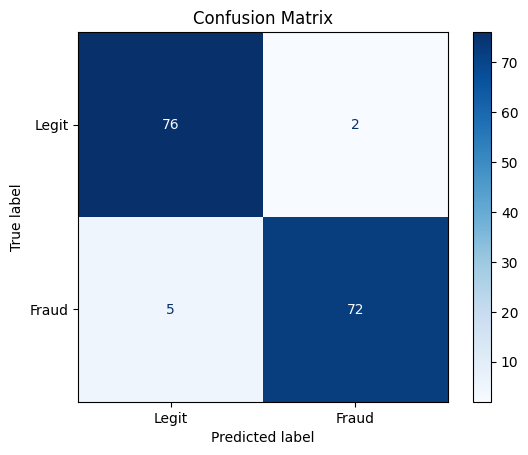

In [62]:
# 1CONFUSION MATRIX
"""
The confusion matrix helps visualize how many predictions were:
- Correctly predicted as Legit (True Negatives)
- Correctly predicted as Fraud (True Positives)
- Incorrectly predicted as Fraud (False Positives)
- Incorrectly predicted as Legit (False Negatives)

This is especially useful for imbalanced datasets like fraud detection.
"""
cm = confusion_matrix(Y_test, X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [63]:
# CLASSIFICATION REPORT
"""
The classification report includes:
- Precision: Of all transactions predicted as fraud, how many were actually fraud?
- Recall: Of all actual fraud transactions, how many were correctly identified?
- F1-score: Harmonic mean of precision and recall (balances both)
This is more informative than accuracy when data is imbalanced.
"""
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction, target_names=["Legit", "Fraud"]))

Classification Report:
              precision    recall  f1-score   support

       Legit       0.94      0.97      0.96        78
       Fraud       0.97      0.94      0.95        77

    accuracy                           0.95       155
   macro avg       0.96      0.95      0.95       155
weighted avg       0.96      0.95      0.95       155



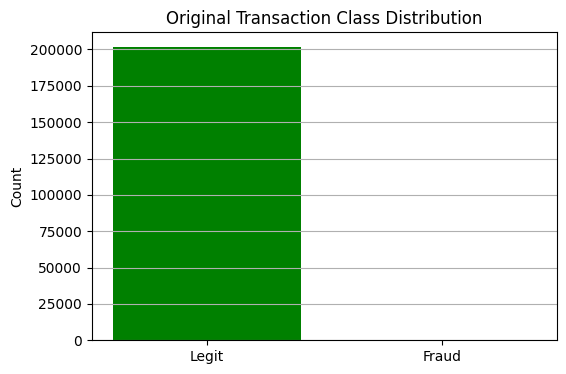

In [64]:
# CLASS DISTRIBUTION BAR CHART
"""
Visualizes how imbalanced the original dataset was.
This explains why we performed under-sampling.
"""
counts = credit_card_data['Class'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(['Legit', 'Fraud'], counts, color=['green', 'red'])
plt.title("Original Transaction Class Distribution")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()